In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
5
%cd /content/drive/MyDrive/samples


/content/drive/MyDrive/samples


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

In [6]:
image = cv2.imread('image_1.jpg')
print("The type of this input is {}".format(type(image))) 

The type of this input is <class 'numpy.ndarray'>


Shape: (426, 640, 3)


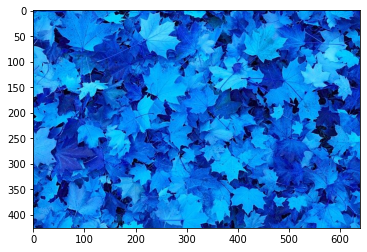

In [7]:
print("Shape: {}".format(image.shape))
plt.imshow(image)

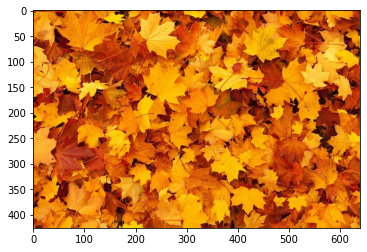

In [8]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

''

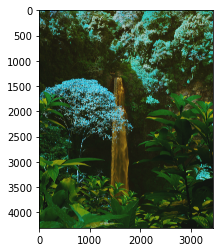

In [9]:
image2 = cv2.imread("image_2.jpg")
plt.imshow(image2)
""

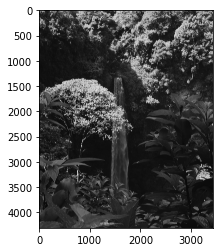

In [10]:
gray_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

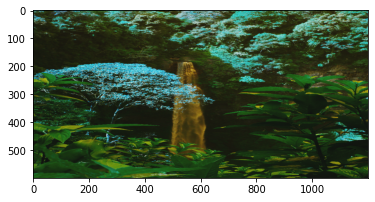

In [11]:
resized_image = cv2.resize(image2, (1200, 600))
plt.imshow(resized_image)

In [12]:
#define a function that can give us the hex values of our the colors that we will identify.


def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [13]:

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [14]:

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([ 34.2072866 , 122.3532816 ,  62.86071288]),
 array([19.69409533, 29.92824559, 26.27636969]),
 array([150.64879792, 192.69964263, 127.6302794 ]),
 array([32.27621317, 75.57040728, 80.57228481]),
 array([25.57858663, 56.11272969, 38.80203472]),
 array([24.62391345, 89.54831335, 42.8647492 ]),
 array([ 51.98906126, 138.666965  , 121.11097852]),
 array([ 96.95205756, 167.21861104,  89.10744603])]

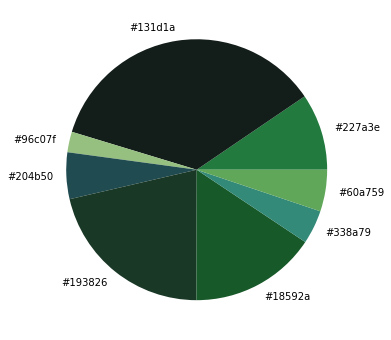

In [15]:
get_colors(get_image('image_4.jpg'), 8, True)

In [17]:
"""From the model above, extract the major colors. 
This create the opportunity to search for images based on certain colors. 
select a color and 
if it's hex matches or is close to the hex of the major colors of the image,
  say it's a match"""
IMAGE_DIRECTORY = '/content/drive/MyDrive/samples'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'maroon':[128,0 , 0],
    'red':[255, 0, 0],
    'orange':[255, 165, 0],
    'gold':[255, 215, 0],
    'olive':[240, 230, 140],
    'indigo':[75, 0, 130],
    'black':[0, 0, 0]
}
images = []


In [18]:
for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

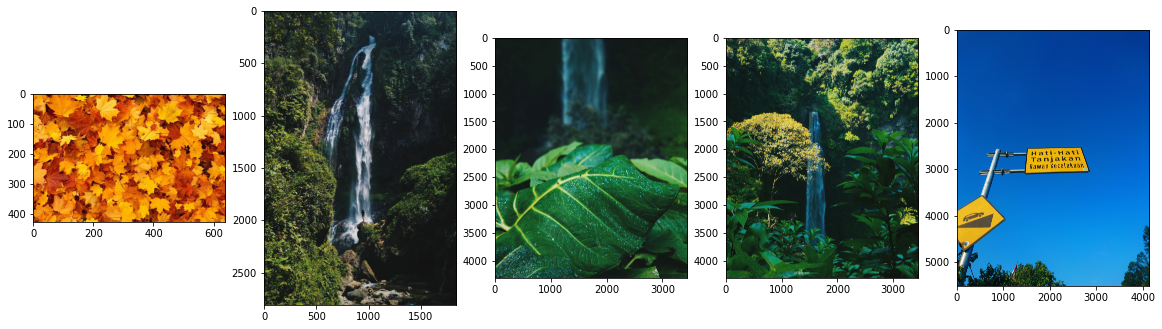

In [19]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [20]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [21]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

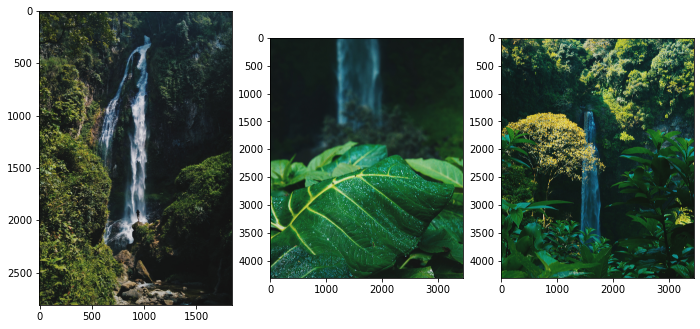

In [22]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 6)

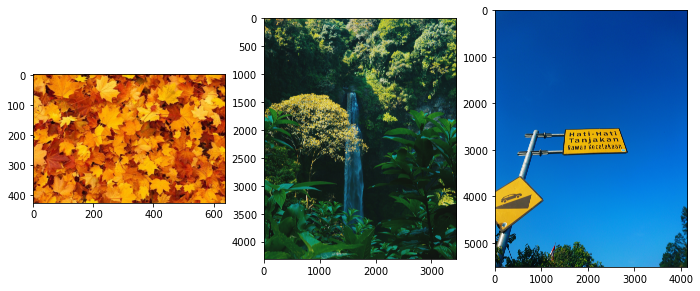

In [33]:
# Search for YELLOW
plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['YELLOW'], 60, 6)

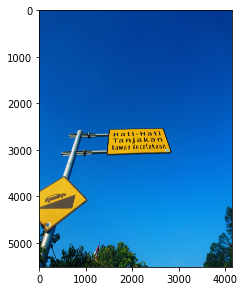

In [23]:
# Search for BLUE
plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['BLUE'], 60, 6)

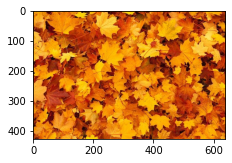

In [24]:
# Search for red
plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['red'], 60, 6)